In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json

import polygon 
import gpx
import sql
import model 

In [2]:
cp_filepath = "../data/geojson/the_bridle.json"
run_filepath = "../data/stravaGPX/AnotherBridleContribution.gpx"
run2_filepath = "../data/stravaGPX/MorningOnTheRes.gpx"

In [3]:
def get_geojson(filepath):
    file = open(filepath, "r") 
    return json.load(file)

def get_coordinates_json(filepath):
    data = get_geojson(filepath)
    return data

def get_coordinates_list(filepath, p=True):
    data = get_coordinates_json(filepath)['features'][0]['geometry']['coordinates']
    if p:
        return data[0]
    return data

In [4]:
data = get_coordinates_list(cp_filepath)
d = pd.DataFrame(data, columns=['longitude', 'latitude'])

In [5]:
f = gpx.coordinates_dataframe_from_gpx(run2_filepath)

In [6]:
df = f.assign(inside=lambda d: d.apply(polygon.row_inside_polygon, args=[data], axis=1))

In [7]:
totals = polygon.twoD_total_inside_polygon(df)

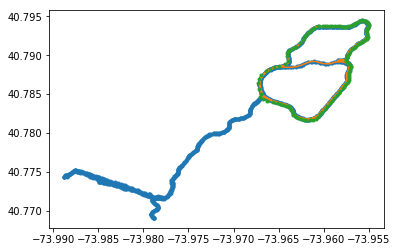

In [8]:
plt.plot(df['longitude'], df['latitude'], '.')
plt.plot(df.loc[df['inside']]['longitude'], df.loc[df['inside']]['latitude'])
plt.plot(d['longitude'], d['latitude'], '.')
plt.show()

In [9]:
totals

time_delta    0 days 00:50:55
distance              10343.5
dtype: object

In [10]:
def calculate_epoch(y, m, d):
    return datetime.datetime(y, m, d, 0, 0, tzinfo=datetime.timezone.utc).timestamp()

In [11]:
calculate_epoch(*d)

TypeError: calculate_epoch() missing 1 required positional argument: 'd'

In [ ]:
d = (2019, 9, 21)
distance = int(totals['distance'])
time = totals['time_delta'].seconds
model.add_run_from_athlete('eileen', d, distance, time)